In [7]:
from sklearn.datasets import load_iris
iris_dataset =load_iris()

In [8]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
print(iris_dataset['DESCR'][:177])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes


In [10]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
print(iris_dataset['target'].shape)
iris_dataset['target']

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
print(type(iris_dataset['data']))
iris_dataset['data'].shape

<class 'numpy.ndarray'>


(150, 4)

In [14]:
import pandas as pd

iris_dataframe = pd.DataFrame(iris_dataset['data'], columns=iris_dataset.feature_names)
scat_mtrx = pd.plotting.scatter_matrix(iris_dataframe, c=iris_dataset['target'], figsize=(10,10), marker='o', hist_kwds={'bins':20}, s=40, alpha=0.8)

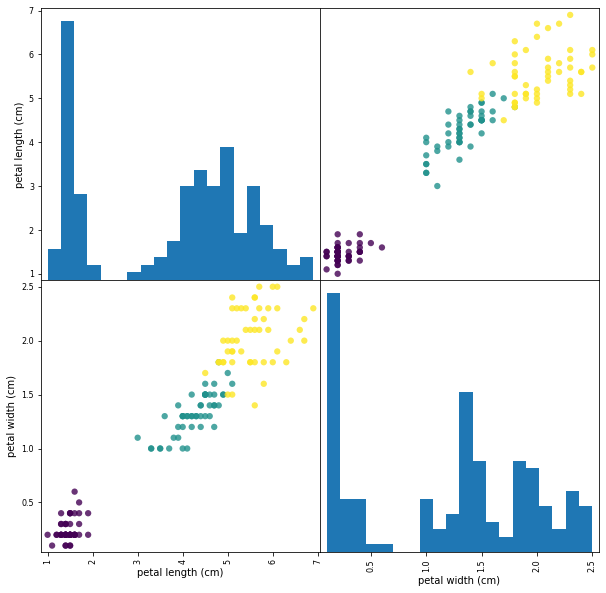

In [15]:
iris_dataframe_simple = pd.DataFrame(iris_dataset.data[:,2:4], columns=iris_dataset.feature_names[2:4])
scat_mtrx = pd.plotting.scatter_matrix(iris_dataframe_simple, c=iris_dataset['target'], figsize=(10,10), marker='o', hist_kwds={'bins':20}, s=40, alpha=0.8)

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris_dataset.data[:,2:4], 
                                                    iris_dataset['target'],
                                                   random_state=0)
print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (112, 2), y_train shape: (112,),
X_test shape: (38, 2), y_test shape: (38,)


In [17]:
import numpy as np

x_train_concat = np.concatenate((x_train, y_train.reshape(112,1)), axis=1)
x_test_concat = np.concatenate((x_test, y_test.reshape(38,1)), axis=1)

print(f'X_train shape: {x_train_concat.shape},\n'
      f'X_test shape: {x_test_concat.shape}')

X_train shape: (112, 3),
X_test shape: (38, 3)


In [18]:
pd.DataFrame(x_train_concat).head(5)

,0,1,2
0,4.2,1.5,1.0
1,4.0,1.2,1.0
2,5.5,2.1,2.0
3,1.3,0.2,0.0
4,5.1,2.3,2.0


In [40]:
import math

def euclidean_distance(data1, data2):
    distance = 0 
    for i in range(len(data1)-1):
        distance += (data1[i] - data2[i])**2
    return math.sqrt(distance)

In [42]:
def get_neighbors(train, test, k =1):
    distances = [(train[i][-1], euclidean_distance(train[i], test))
                for i in range (len(train))]
    distances.sort(key=lambda elem: elem[1])
    
    neighbors = [distances[i][0] for i in range(k)]
    return neighbors

In [37]:
def prediction(neighbors):
    count ={}
    for instance in neighbors:
        if instance in count:
            count[instance] +=1
        else:
            count[instance] =1
    target = max(count.items(), key=lambda x: x[1])[0]
    return target

In [45]:
def accuracy(test, test_prediction):
    correct = 0
    for i in range(len(test)):
        if test[i][-1] == test_prediction[i]:
            correct+=1
    return (correct / len(test))
        

In [46]:
predictions = []
for x in range(len(x_test_concat)):
    neighbors = get_neighbors(x_train_concat, x_test_concat[x], k=5)
    result = prediction(neighbors)
    predictions.append(result)

accuracy_ = accuracy(x_test_concat, predictions)
print(f'Accuracy: {accuracy_}')

Accuracy: 0.9736842105263158


In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [51]:
knn_model = knn.fit(x_train, y_train)

In [53]:
knn_predictions = knn.predict(x_test)
knn_predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [54]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, knn_predictions)
print(f'Accuracy: {accuracy_}')

Accuracy: 0.9736842105263158
